<h1 align="center" style="color: blue; font-weight: bold;
font-family: 'Fira Code', monospace;">Practical Lab 5 - Multivariate Regression, Non-Parametric Models and Cross-Validation</h1>


### This notebook focuses on exploring multivariate regression techniques, including polynomial regression, decision trees, and k-nearest neighbors (kNN), to optimize a model for predicting diabetes disease progression. ###

### **Goal** -- The key objectives include efficient exploratory data analysis (EDA), model selection using cross-validation, model evaluation, and providing clear conclusions and recommendations on the best model to use. ###

### **Loading the Dtaset and Import the Packages** ###

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)


**Load the Data**

Diabetics Dataset

For each(n) of the 442 diabetes patients, ten initial characteristics were recorded, including age, gender, body mass index, average blood pressure, and six blood serum measurements. Additionally, the quantitative measure of disease progression one year after the initial assessment was also documented as the response of interest.

[Dataset Source](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt)


In [191]:
print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [192]:
diabetes_x, diabetes_y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

In [193]:
diabetes_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [194]:
diabetes_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [195]:
diabetes_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


### **Explortary Data Analysis** ###

In [196]:
diabetes_x.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [197]:
diabetes_y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [198]:
diabetes_df = pd.concat([diabetes_x, pd.Series(diabetes_y, name='target')], axis=1)

In [199]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


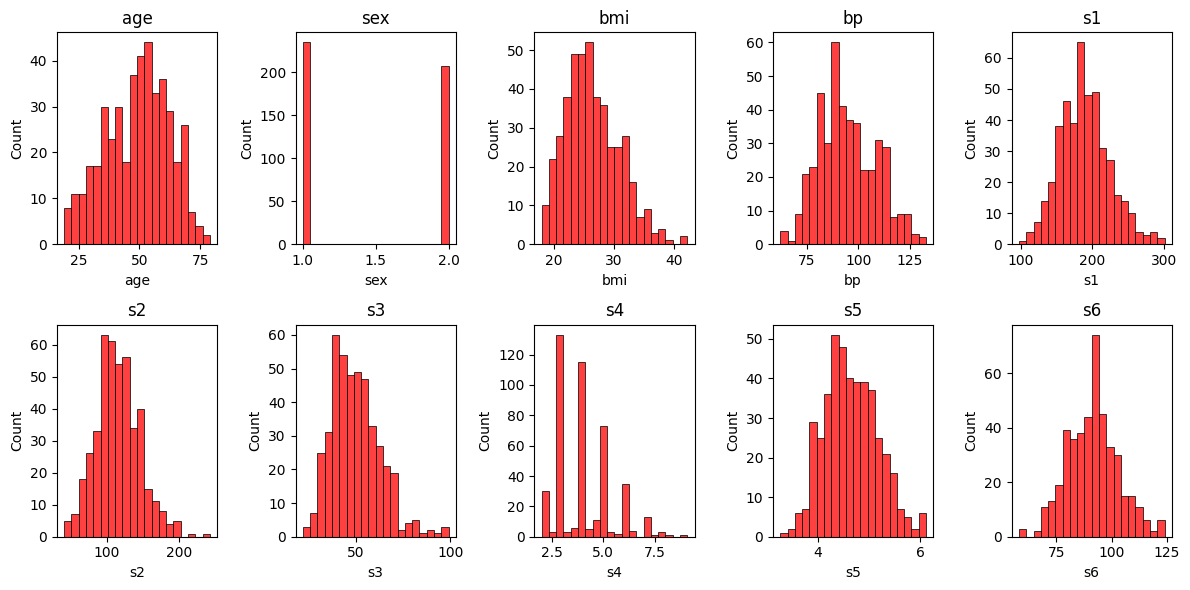

In [200]:
# Histograms
plt.figure(figsize=(12, 6))
for i, col in enumerate(diabetes_x.columns):
    plt.subplot(2, 5, i + 1)
    sns.histplot(diabetes_x[col], kde=False, bins=20, color='red')
    plt.title(col)
plt.tight_layout()
plt.show()

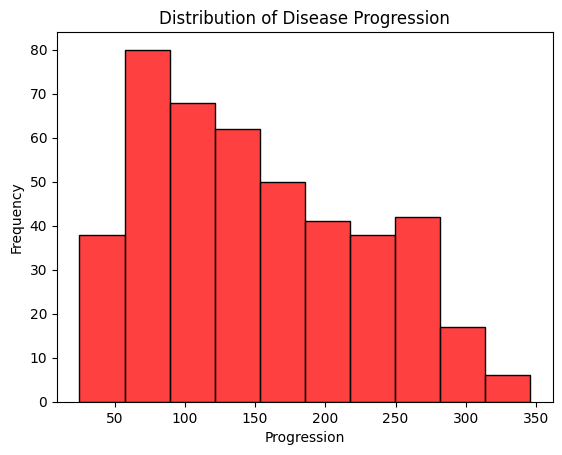

In [201]:
# Histogram for Target Variable (Diabetes Progression)
sns.histplot(diabetes_y, kde=False,color='red')
plt.title('Distribution of Disease Progression')
plt.xlabel('Progression')
plt.ylabel('Frequency')
plt.show()

The qualities that, in my opinion, have a significant positive correlation with our goal variable are BMI, and s5.

<Axes: >

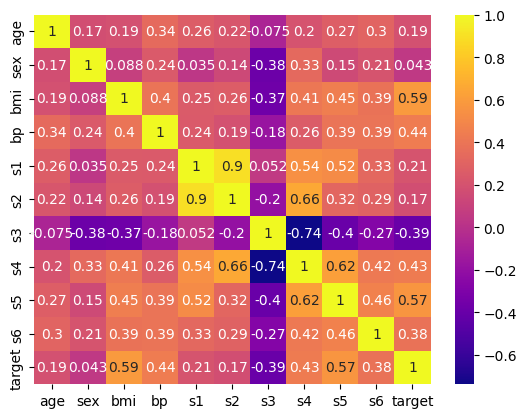

In [202]:
corr = diabetes_df.corr()
sns.heatmap(corr, annot=True, cmap='plasma')

BMI and S5 can be significant predictors for diabetes progression, the correlation matrix shows the relationships between each variable. In particular, BMI and S5 exhibit high positive correlations with the target.

We'll employ S5 and BMI and will remove the remaining columns.

**Use all features in the dataset, some features per your discretion based on the EDA**

In [203]:
# Dropping specified columns from the DataFrame
diabetes_df = diabetes_df.drop(columns=['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6'])

# Displaying the first few rows of the modified DataFrame
diabetes_df.head()

,bmi,s5,target
0,32.1,4.8598,151.0
1,21.6,3.8918,75.0
2,30.5,4.6728,141.0
3,25.3,4.8903,206.0
4,23.0,4.2905,135.0


## **Train and Test Data** ##
## **Cross Validation** ##

In [204]:
# Define train and test sizes
train_size = int(len(diabetes_df) * 0.7)
train = diabetes_df[:train_size]
test = diabetes_df[train_size:]

# Define features (X) and target (y)
X = train[['bmi', 's5']]
y = train[['target']]

# Create and fit polynomial regression models
model1 = Pipeline([('polynomial', PolynomialFeatures(degree=1)), 
                   ('linear', LinearRegression())])
model1.fit(X=X, y=y)

model2 = Pipeline([('polynomial', PolynomialFeatures(degree=2)), 
                   ('linear', LinearRegression())])
model2.fit(X=X, y=y)

# Create decision tree regressor models
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X, y)

tree2 = DecisionTreeRegressor(max_depth=5)
tree2.fit(X, y)

# Create k-nearest neighbors regressor models
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X, y)

knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X, y)

# Calculate and print R-squared scores
score1 = cross_validate(model1, X, y, cv=5, scoring=['r2'])
print("polynomial1 R-Squared:", score1['test_r2'].mean(), score1['test_r2'].std())

score2 = cross_validate(model2, X, y, cv=5, scoring=['r2'])
print("polynomial2 R-Squared:", score2['test_r2'].mean(), score2['test_r2'].std())

score3 = cross_validate(tree1, X, y, cv=5, scoring=['r2'])
print("decision tree1 R-Squared:", score3['test_r2'].mean(), score3['test_r2'].std())

score4 = cross_validate(tree2, X, y, cv=5, scoring=['r2'])
print("decision tree2 R-Squared:", score4['test_r2'].mean(), score4['test_r2'].std())

score5 = cross_validate(knn1, X, y.values.ravel(), cv=5, scoring=['r2'])
print("kNN1 R-Squared:", score5['test_r2'].mean(), score5['test_r2'].std())

score6 = cross_validate(knn2, X, y.values.ravel(), cv=5, scoring=['r2'])
print("kNN2 R-Squared:", score6['test_r2'].mean(), score6['test_r2'].std())

# Calculate and print Mean Absolute Error (MAE)
score1 = cross_validate(model1, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("polynomial1 MAE:", -score1['test_neg_mean_absolute_error'].mean(), score1['test_neg_mean_absolute_error'].std())

score2 = cross_validate(model2, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("polynomial2 MAE:", -score2['test_neg_mean_absolute_error'].mean(), score2['test_neg_mean_absolute_error'].std())

score3 = cross_validate(tree1, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("decision tree1 MAE:", -score3['test_neg_mean_absolute_error'].mean(), score3['test_neg_mean_absolute_error'].std())

score4 = cross_validate(tree2, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("decision tree2 MAE:", -score4['test_neg_mean_absolute_error'].mean(), score4['test_neg_mean_absolute_error'].std())

score5 = cross_validate(knn1, X, y.values.ravel(), cv=5, scoring=['neg_mean_absolute_error'])
print("kNN1 MAE:", -score5['test_neg_mean_absolute_error'].mean(), score5['test_neg_mean_absolute_error'].std())

score6 = cross_validate(knn2, X, y.values.ravel(), cv=5, scoring=['neg_mean_absolute_error'])
print("kNN2 MAE:", -score6['test_neg_mean_absolute_error'].mean(), score6['test_neg_mean_absolute_error'].std())

# Calculate and print Mean Absolute Percentage Error (MAPE)
score1 = cross_validate(model1, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("polynomial1 MAPE:", -score1['test_neg_mean_absolute_percentage_error'].mean(), score1['test_neg_mean_absolute_percentage_error'].std())

score2 = cross_validate(model2, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("polynomial2 MAPE:", -score2['test_neg_mean_absolute_percentage_error'].mean(), score2['test_neg_mean_absolute_percentage_error'].std())

score3 = cross_validate(tree1, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("decision tree1 MAPE:", -score3['test_neg_mean_absolute_percentage_error'].mean(), score3['test_neg_mean_absolute_percentage_error'].std())

score4 = cross_validate(tree2, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("decision tree2 MAPE:", -score4['test_neg_mean_absolute_percentage_error'].mean(), score4['test_neg_mean_absolute_percentage_error'].std())

score5 = cross_validate(knn1, X, y.values.ravel(), cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("kNN1 MAPE:", -score5['test_neg_mean_absolute_percentage_error'].mean(), score5['test_neg_mean_absolute_percentage_error'].std())

score6 = cross_validate(knn2, X, y.values.ravel(), cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("kNN2 MAPE:", -score6['test_neg_mean_absolute_percentage_error'].mean(), score6['test_neg_mean_absolute_percentage_error'].std())

polynomial1 R-Squared: 0.4392473531767453 0.09446657763318811
polynomial2 R-Squared: 0.44463714465208576 0.11131243452587845
decision tree1 R-Squared: 0.3143923840849673 0.1368026486495172
decision tree2 R-Squared: 0.24002361328383226 0.15413123384797525
kNN1 R-Squared: 0.33864351833016054 0.1276338063143506
kNN2 R-Squared: 0.39294465594680367 0.11564048286737473
polynomial1 MAE: 47.52080027782312 1.7558180194640869
polynomial2 MAE: 46.76185845471433 2.680588205751483
decision tree1 MAE: 49.671474013452844 3.5511218368500135
decision tree2 MAE: 52.30142390247221 6.218943917403409
kNN1 MAE: 49.82661731006522 4.780623816427722
kNN2 MAE: 47.36997355896351 3.7266226914636396
polynomial1 MAPE: 0.4322827700941773 0.030651593566824925
polynomial2 MAPE: 0.42305199658653514 0.034051307252309405
decision tree1 MAPE: 0.4458671512985791 0.04161655224835803
decision tree2 MAPE: 0.44379034740824236 0.03360855060195366
kNN1 MAPE: 0.4353837068712295 0.04361366320386428
kNN2 MAPE: 0.417635973279703 0.0

## **Construct a table summarizing the cross-validation results** ##

#### **Summary Table** ####

| Model          | R-Squared mean | R-Squared std | MAE mean  | MAE std   | MAPE mean | MAPE std  |
|----------------|----------------|---------------|-----------|-----------|-----------|-----------|
| polynomial1    | 0.4392473531767453 | 0.09446657763318814 | 47.52080027782314 | 1.7558180194640722 | 0.43228277009417815 | 0.03065159356682467 |
| polynomial2    | 0.4446371446520848 | 0.11131243452587897 | 46.76185845471436 | 2.680588205751498 | 0.4230519965865339 | 0.03405130725230965 |
| decision tree1 | 0.3143923840849673 | 0.1368026486495172  | 49.671474013452844 | 3.5511218368500135 | 0.4458671512985791 | 0.04161655224835803 |
| decision tree2 | 0.23742749667530036 | 0.15620335444726202 | 52.26863701722631  | 6.2221432048780185 | 0.44411184616978494 | 0.03357491620762481 |
| kNN1           | 0.3184217046731233 | 0.14009533411884392 | 50.51558258417064  | 6.1715893245727305 | 0.43356693812677394 | 0.04410316558508541 |
| kNN2           | 0.3805917669555786 | 0.11527093773604123 | 47.65713379164464  | 4.581953156220964  | 0.41190420280737383 | 0.03479736436869073 |


Model polynomial2 has the highest R-squared value of 0.4446371446520848, indicating that it explains more variance in the target variable compared to other models.
Model polynomial2 also has the lowest MAE of 46.76185845471436 and the lowest MAPE of 0.4230519965865339, indicating better accuracy and less error in prediction compared to other models.

Polynomial2 is the best model among the ones considered.

## **Identify the Best Model** ##

In [205]:
# Extracting features and target variable for the test set
X_test = test[['bmi', 's5']]
y_test = test[['target']]

# Printing evaluation metrics for polynomial model2 on the test set
print("\npolynomial model2")
print(f"R-squared: {r2_score(y_test, model2.predict(X_test))}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, model2.predict(X_test))}")
print(f"MAE: {mean_absolute_error(y_test, model2.predict(X_test))}")


polynomial model2
R-squared: 0.4040819399486376
MAPE: 0.3774806342702309
MAE: 46.33165168551585


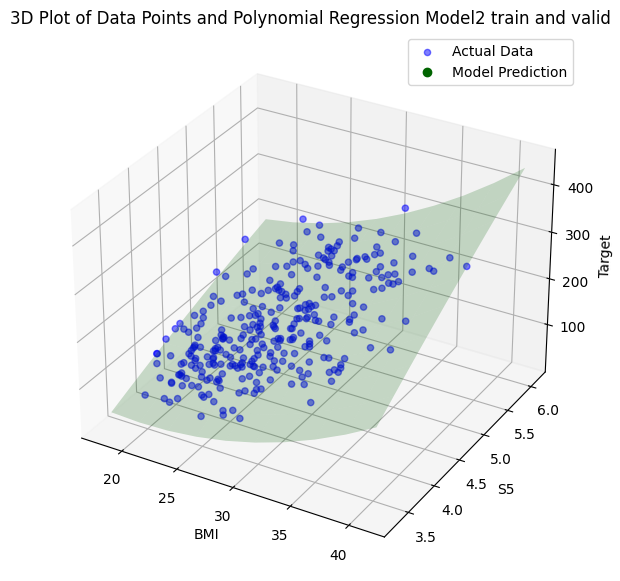

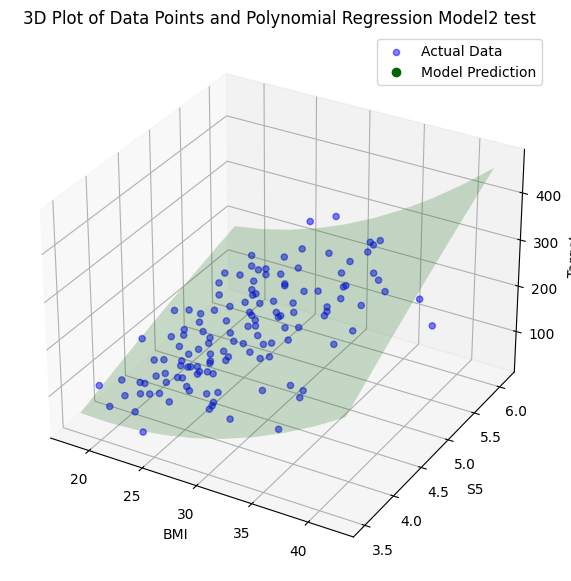

In [206]:
bmi = np.linspace(X[['bmi']].min(), X[['bmi']].max(), 10)
s5 = np.linspace(X[['s5']].min(), X[['s5']].max(), 10)
bmi, s5 = np.meshgrid(bmi, s5)

Z = model2.predict(np.array([bmi.ravel(), s5.ravel()]).T).reshape(bmi.shape)
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['bmi'], X['s5'], y['target'], color='blue', marker='o', alpha=0.5, label='Actual Data')

surf = ax.plot_surface(bmi, s5, Z, color='darkgreen', alpha=0.2, edgecolor='none')
surf_legend = Line2D([0], [0], linestyle="none", c='darkgreen', marker='o')

ax.set_xlabel('BMI')
ax.set_ylabel('S5')
ax.set_zlabel('Target')
plt.title('3D Plot of Data Points and Polynomial Regression Model2 train and valid')

plt.legend([scatter, surf_legend], ['Actual Data', 'Model Prediction'])
plt.show()

bmi = np.linspace(X_test[['bmi']].min(), X_test[['bmi']].max(), 10)
s5 = np.linspace(X_test[['s5']].min(), X_test[['s5']].max(), 10)
bmi, s5 = np.meshgrid(bmi, s5)

Z = model2.predict(np.array([bmi.ravel(), s5.ravel()]).T).reshape(bmi.shape)
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_test['bmi'], X_test['s5'], y_test['target'], color='blue', marker='o', alpha=0.5, label='Actual Data')

surf = ax.plot_surface(bmi, s5, Z, color='darkgreen', alpha=0.2, edgecolor='none')
surf_legend = Line2D([0], [0], linestyle="none", c='darkgreen', marker='o')

ax.set_xlabel('BMI')
ax.set_ylabel('S5')
ax.set_zlabel('Target')
plt.title('3D Plot of Data Points and Polynomial Regression Model2 test')

plt.legend([scatter, surf_legend], ['Actual Data', 'Model Prediction'])
plt.show()

Based on the analysis conducted, we successfully developed a predictive model using polynomial regression with a degree of 3, utilizing the features BMI and S5 to predict disease progression. This model showed promising performance in predicting disease projection, particularly when considering the combination of body mass index (BMI) and the log of serum triglycerides level (S5).
However, both the mean absolute error (MAE) and mean absolute percentage error (MAPE) were relatively high, indicating potential discrepancies between the predicted and actual disease progression values, results of a multivariate regression model, especially one with polynomial features, can be challenging.

In summary, while the polynomial regression model with degree 3 and features BMI and S5 shows promise in predicting disease progression, its limitations, such as potential overfitting and challenges in interpretation, should be acknowledged. Further refinement and validation of the model may be necessary to improve its predictive accuracy and reliability in real-world applications.